# Data Analysis and Visualization
# *(1000 samples dataset)*
___

## Prepare Data

**Import required libraries for Data Analysis and Visualization**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set(font_scale=1)

**Import excel file as a dataframe call data_1000**

In [2]:
data_1000 = pd.read_excel("E:\\VSProject\\TTNT\\DataScience\\data_1000_samples_clean.xlsx")
data_1000

,Time,Temp,Weather,Wind,Humidity,Barometer,Visibility,Day,Month,Year
0,12:00 SA,22,Passing clouds.,4,88,1016,NaN,1,3,2022
1,12:30 SA,22,Passing clouds.,4,88,1015,NaN,1,3,2022
2,1:00 SA,22,Passing clouds.,4,83,1015,NaN,1,3,2022
3,1:30 SA,21,Passing clouds.,4,88,1015,8.0,1,3,2022
4,2:00 SA,21,Passing clouds.,2,88,1015,8.0,1,3,2022
...,...,...,...,...,...,...,...,...,...,...
996,5:00 CH,28,Passing clouds.,19,79,1009,NaN,22,3,2022
997,5:30 CH,28,Passing clouds.,13,79,1009,NaN,22,3,2022
998,6:00 CH,27,Passing clouds.,11,84,1009,NaN,22,3,2022
999,6:30 CH,27,Passing clouds.,11,84,1009,NaN,22,3,2022


**Check info() of data_DB**

In [3]:
data_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        1001 non-null   object 
 1   Temp        1001 non-null   int64  
 2   Weather     1001 non-null   object 
 3   Wind        1001 non-null   int64  
 4   Humidity    1001 non-null   int64  
 5   Barometer   1001 non-null   int64  
 6   Visibility  349 non-null    float64
 7   Day         1001 non-null   int64  
 8   Month       1001 non-null   int64  
 9   Year        1001 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


**Data Preprocessing**

In [4]:
# Notice that >50% data value of Visibility is null
# Perhaps because of visibility at that time is infinite
data_1000.isnull().sum()

Time            0
Temp            0
Weather         0
Wind            0
Humidity        0
Barometer       0
Visibility    652
Day             0
Month           0
Year            0
dtype: int64

In [5]:
# We will not focus on analysis and forecast this visibility feature 
# because of its significant numbers of null value
data = data_1000.drop(["Visibility"], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       1001 non-null   object
 1   Temp       1001 non-null   int64 
 2   Weather    1001 non-null   object
 3   Wind       1001 non-null   int64 
 4   Humidity   1001 non-null   int64 
 5   Barometer  1001 non-null   int64 
 6   Day        1001 non-null   int64 
 7   Month      1001 non-null   int64 
 8   Year       1001 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 70.5+ KB


## Data Analysis and Visualization

**Some important Descriptive Statistics**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,1001.0,25.233766,2.406927,19.0,24.0,25.0,27.0,33.0
Wind,1001.0,6.800200,4.574936,0.0,4.0,6.0,9.0,22.0
Humidity,1001.0,79.522478,10.601026,54.0,70.0,83.0,89.0,94.0
Barometer,1001.0,1011.448551,2.850544,1006.0,1009.0,1011.0,1014.0,1018.0
Day,1001.0,11.475524,6.295526,1.0,6.0,12.0,17.0,22.0
Month,1001.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
Year,1001.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0


array([[<AxesSubplot: title={'center': 'Temp'}>,
        <AxesSubplot: title={'center': 'Wind'}>,
        <AxesSubplot: title={'center': 'Humidity'}>],
       [<AxesSubplot: title={'center': 'Barometer'}>,
        <AxesSubplot: title={'center': 'Day'}>,
        <AxesSubplot: title={'center': 'Month'}>],
       [<AxesSubplot: title={'center': 'Year'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

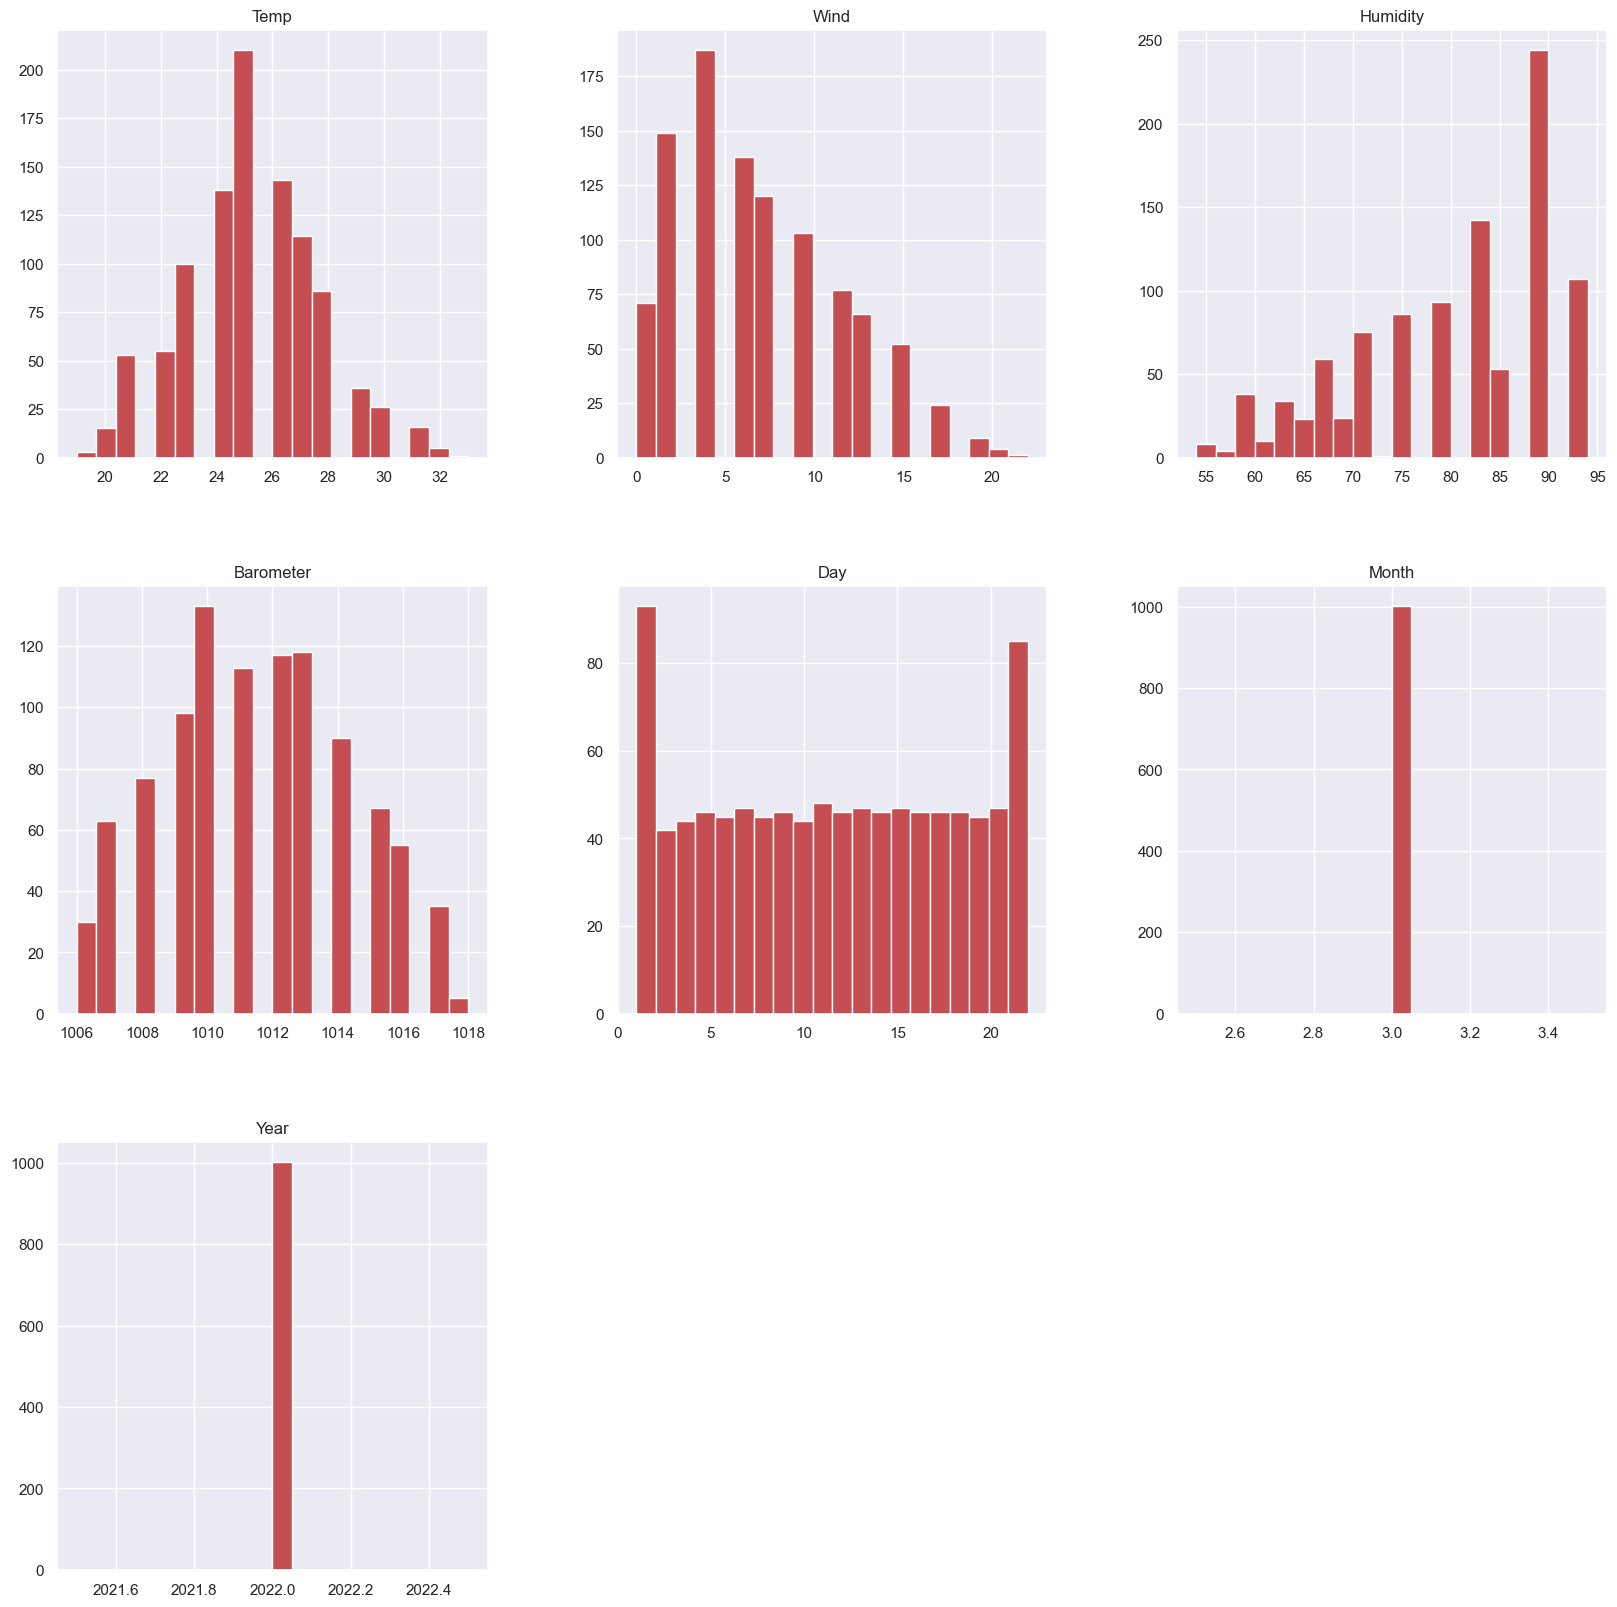

In [7]:
data.hist(bins = 20, figsize = (20,20), color = 'r')

**Information of weather types**

In [8]:
weather_type = data["Weather"].unique()
print(weather_type)
print(len(weather_type))

['Passing clouds.' 'Scattered clouds.' 'Light rain. Passing clouds.'
 'Partly cloudy.' 'Mostly cloudy.' 'Partly sunny.' 'Overcast.'
 'Broken clouds.' 'Light rain. Broken clouds.' 'Warm.'
 'Light rain. Partly cloudy.' 'Clear.' 'Sunny.' 'Fog.' 'Light rain. Fog.']
15


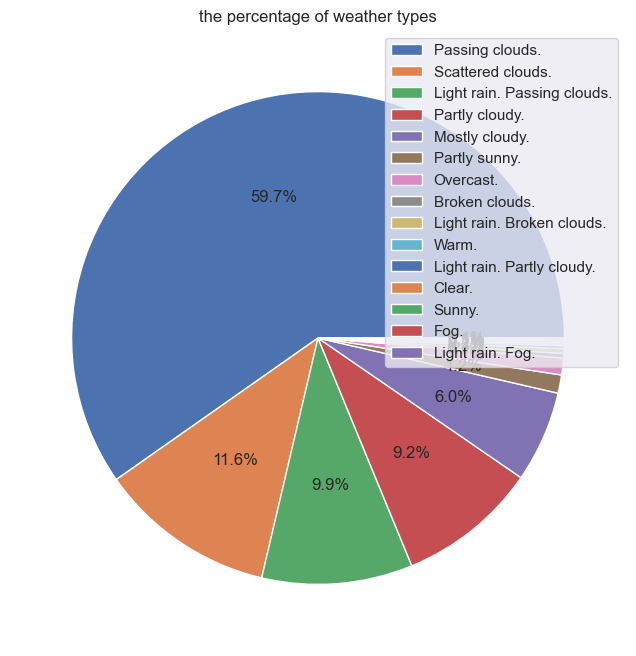

In [9]:
plt.figure(figsize = (10,8))
plt.title('the percentage of weather types')
plt.pie(data_1000["Weather"].value_counts().values, autopct='%1.1f%%')
plt.legend(labels=data_1000['Weather'].unique(), loc = 'upper right')

* In year 2022, primarily type of weather is Cloudy, especially passing clouds, scattered cloudy

In [10]:
datatest = data.copy()


**Information of features according to day**

Day
1     AxesSubplot(0.125,0.11;0.775x0.77)
2     AxesSubplot(0.125,0.11;0.775x0.77)
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
11    AxesSubplot(0.125,0.11;0.775x0.77)
12    AxesSubplot(0.125,0.11;0.775x0.77)
13    AxesSubplot(0.125,0.11;0.775x0.77)
14    AxesSubplot(0.125,0.11;0.775x0.77)
15    AxesSubplot(0.125,0.11;0.775x0.77)
16    AxesSubplot(0.125,0.11;0.775x0.77)
17    AxesSubplot(0.125,0.11;0.775x0.77)
18    AxesSubplot(0.125,0.11;0.775x0.77)
19    AxesSubplot(0.125,0.11;0.775x0.77)
20    AxesSubplot(0.125,0.11;0.775x0.77)
21    AxesSubplot(0.125,0.11;0.775x0.77)
22    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Temp, dtype: object

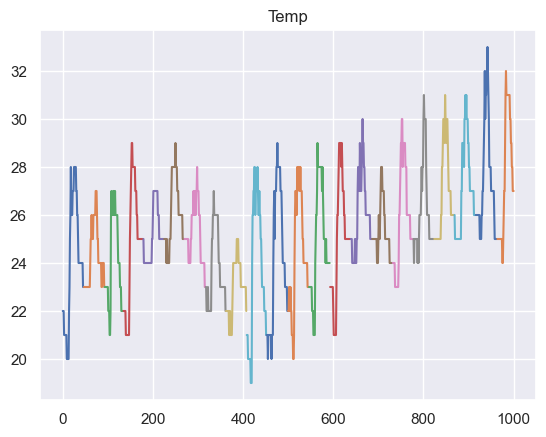

In [11]:
# Temp
plt.title('Temp')
datatest.groupby('Day')['Temp'].plot()

In [12]:
datatest[datatest["Day"] == 1][['Time', 'Temp']].nlargest(5, columns = 'Temp')

,Time,Temp
18,9:00 SA,28
25,12:30 CH,28
26,1:00 CH,28
27,1:30 CH,28
28,2:00 CH,28


In [13]:
datatest[datatest["Day"] == 1][['Time', 'Temp']].nsmallest(5, columns = 'Temp')

,Time,Temp
9,4:30 SA,20
10,5:00 SA,20
11,5:30 SA,20
12,6:00 SA,20
13,6:30 SA,20


* Temperature at noon is highest and lowest in early morning for all day
* The last days of March have high temperature

Day
1     AxesSubplot(0.125,0.11;0.775x0.77)
2     AxesSubplot(0.125,0.11;0.775x0.77)
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
11    AxesSubplot(0.125,0.11;0.775x0.77)
12    AxesSubplot(0.125,0.11;0.775x0.77)
13    AxesSubplot(0.125,0.11;0.775x0.77)
14    AxesSubplot(0.125,0.11;0.775x0.77)
15    AxesSubplot(0.125,0.11;0.775x0.77)
16    AxesSubplot(0.125,0.11;0.775x0.77)
17    AxesSubplot(0.125,0.11;0.775x0.77)
18    AxesSubplot(0.125,0.11;0.775x0.77)
19    AxesSubplot(0.125,0.11;0.775x0.77)
20    AxesSubplot(0.125,0.11;0.775x0.77)
21    AxesSubplot(0.125,0.11;0.775x0.77)
22    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Humidity, dtype: object

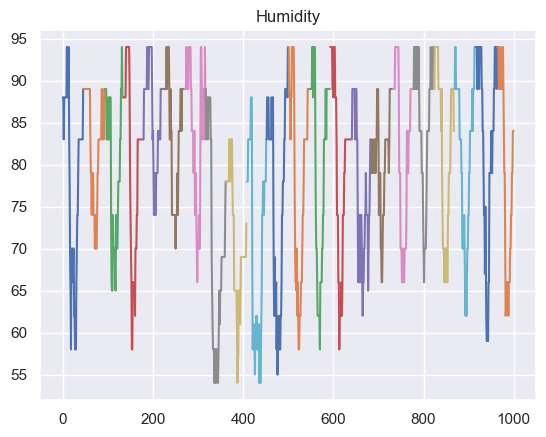

In [14]:
# Humidity
plt.title('Humidity')
datatest.groupby('Day')['Humidity'].plot()

In [15]:
datatest[datatest["Day"] == 1][['Time', 'Humidity']].nlargest(5, columns = 'Humidity')

,Time,Humidity
9,4:30 SA,94
13,6:30 SA,94
45,11:00 CH,89
46,11:30 CH,89
0,12:00 SA,88


In [16]:
datatest[datatest["Day"] == 1][['Time', 'Humidity']].nsmallest(5, columns = 'Humidity')

,Time,Humidity
18,9:00 SA,58
27,1:30 CH,58
28,2:00 CH,58
29,2:30 CH,58
25,12:30 CH,62


* Humidity is high in early morning and midnight, low at nearly noon for all day

Day
1     AxesSubplot(0.125,0.11;0.775x0.77)
2     AxesSubplot(0.125,0.11;0.775x0.77)
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
11    AxesSubplot(0.125,0.11;0.775x0.77)
12    AxesSubplot(0.125,0.11;0.775x0.77)
13    AxesSubplot(0.125,0.11;0.775x0.77)
14    AxesSubplot(0.125,0.11;0.775x0.77)
15    AxesSubplot(0.125,0.11;0.775x0.77)
16    AxesSubplot(0.125,0.11;0.775x0.77)
17    AxesSubplot(0.125,0.11;0.775x0.77)
18    AxesSubplot(0.125,0.11;0.775x0.77)
19    AxesSubplot(0.125,0.11;0.775x0.77)
20    AxesSubplot(0.125,0.11;0.775x0.77)
21    AxesSubplot(0.125,0.11;0.775x0.77)
22    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Wind, dtype: object

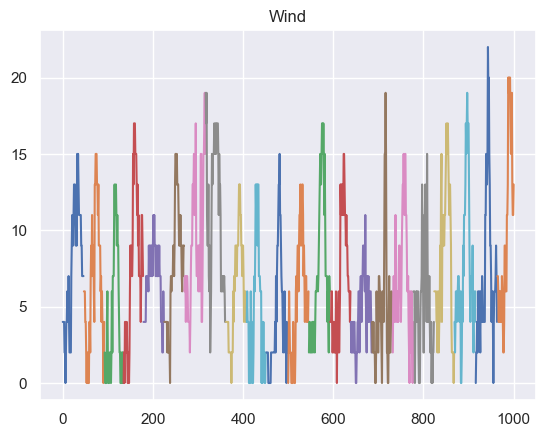

In [17]:
# Wind
plt.title('Wind')
datatest.groupby('Day')['Wind'].plot()

In [18]:
datatest[datatest["Day"] == 1][['Time', 'Wind']].nlargest(5, columns = 'Wind')

,Time,Wind
32,4:00 CH,15
34,5:00 CH,15
25,12:30 CH,13
26,1:00 CH,13
27,1:30 CH,13


In [19]:
datatest[datatest["Day"] == 1][['Time', 'Wind']].nsmallest(5, columns = 'Wind')

,Time,Wind
6,3:00 SA,0
4,2:00 SA,2
5,2:30 SA,2
7,3:30 SA,2
15,7:30 SA,2


* Wind blows strongly in afternoon and weakly around 2 to 5 in the morning all day on March

Day
1     AxesSubplot(0.125,0.11;0.775x0.77)
2     AxesSubplot(0.125,0.11;0.775x0.77)
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
11    AxesSubplot(0.125,0.11;0.775x0.77)
12    AxesSubplot(0.125,0.11;0.775x0.77)
13    AxesSubplot(0.125,0.11;0.775x0.77)
14    AxesSubplot(0.125,0.11;0.775x0.77)
15    AxesSubplot(0.125,0.11;0.775x0.77)
16    AxesSubplot(0.125,0.11;0.775x0.77)
17    AxesSubplot(0.125,0.11;0.775x0.77)
18    AxesSubplot(0.125,0.11;0.775x0.77)
19    AxesSubplot(0.125,0.11;0.775x0.77)
20    AxesSubplot(0.125,0.11;0.775x0.77)
21    AxesSubplot(0.125,0.11;0.775x0.77)
22    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Barometer, dtype: object

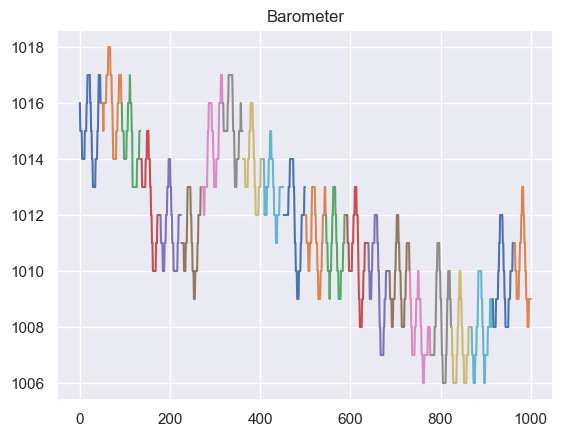

In [20]:
plt.title('Barometer')
datatest.groupby('Day')['Barometer'].plot()

In [21]:
datatest[datatest["Day"] == 1][['Time', 'Barometer']].nlargest(5, columns = 'Barometer')

,Time,Barometer
17,8:30 SA,1017
18,9:00 SA,1017
19,9:30 SA,1017
20,10:00 SA,1017
21,10:30 SA,1017


In [22]:
datatest[datatest["Day"] == 1][['Time', 'Barometer']].nsmallest(5, columns = 'Barometer')

,Time,Barometer
29,2:30 CH,1013
30,3:00 CH,1013
31,3:30 CH,1013
32,4:00 CH,1013
33,4:30 CH,1013


* Barometer is high in morning and low in afternoon for all day
* Barometer is low for the last days of March

**Interesting notice that Temp is inversely proportional to humidity**

<AxesSubplot: xlabel='Temp', ylabel='Humidity'>

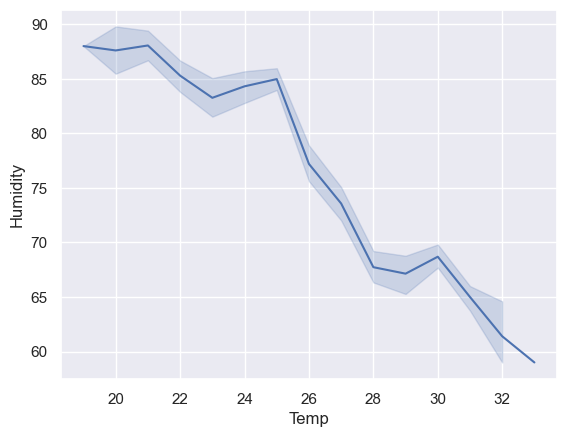

In [23]:
sns.lineplot(datatest, x = datatest['Temp'], y = datatest['Humidity'])

* Proven. When temperature increase, the air will become drier, so humidity reduce and vice versa.

**Correlation heatmap**

<AxesSubplot: title={'center': 'Correlation Heatmap of 4 features'}>

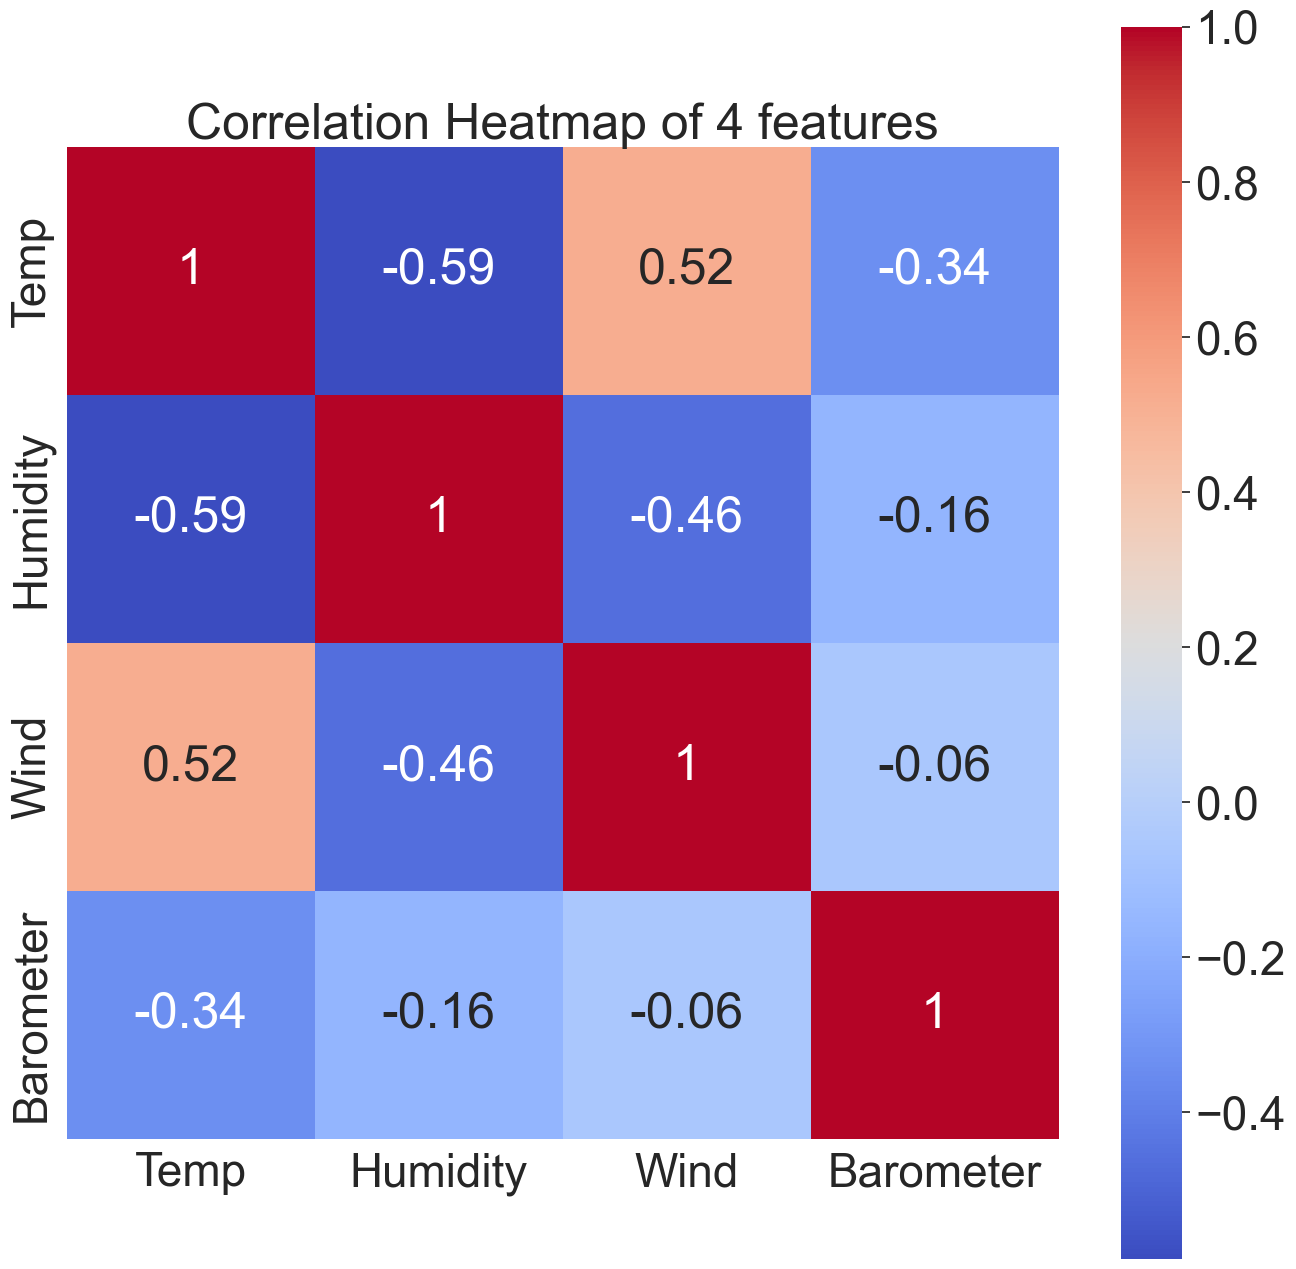

In [24]:

sns.set(font_scale=3)
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of 4 features')
fig.set_size_inches((16,16))
sns.heatmap(datatest[['Temp', 'Humidity', 'Wind', 'Barometer']].corr(), square = True, annot = True, cmap='coolwarm')

# Walkthrough above analysis, Temp is inversely proporsional to Humidity and Barometer, but proporsional to Wind
# Another relationship can be seen in matrix.